## Create the grading system for school districts in King County

## Create the grading system for school districts in King County

In [66]:
# for webscraping
import os 
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time 
import sys
import numpy as np
import pandas as pd 
import regex as re 
import requests
import lxml
from lxml.html.soupparser import fromstring
import prettify
import numbers 
import htmltext

# for visuals using geopandas
from shapely.geometry import Point, Polygon 
import geopandas as gpd
import descartes

# for plotting 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from scipy.stats import gaussian_kde
from matplotlib.font_manager import FontProperties
from matplotlib.path import Path
from matplotlib.textpath import TextToPath
import tilemapbase
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)
import adjustText as aT
import shapely.speedups
shapely.speedups.enable()

# for stats (min,max,mean)
import statistics

In [68]:
data= pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [70]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Handling Null values or special characters

In [71]:
data.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [72]:
data.loc[data['sqft_basement'] == "?"]['sqft_basement']

6        ?
18       ?
42       ?
79       ?
112      ?
        ..
21442    ?
21447    ?
21473    ?
21519    ?
21581    ?
Name: sqft_basement, Length: 454, dtype: object

In [73]:
## Cannot convert the data type to a float because some of the rows contain a '?'
#data['sqft_basement'] = data['sqft_basement'].astype(float)

There are 454 rows that have an unknown value for the sqft_basement
Will be filling the missing values with the features's median. The reason for keeping these values is because

In [74]:
median = data.loc[data['sqft_basement'] != '?']['sqft_basement'].median()
print(median)

0.0


In [75]:
data['sqft_basement'] = data['sqft_basement'].replace('?', median)
data['sqft_basement'] = data['sqft_basement'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


### Detecting and Dealing with Null Values

In [76]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [77]:
print('Number missing both yr_renovated & waterfront:', len(data[(data.yr_renovated.isnull())
                                                               & (data.waterfront.isnull())]))

Number missing both yr_renovated & waterfront: 430


In [78]:
data.dropna(subset=['waterfront'], inplace=True)
print(data.isnull().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               57
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3412
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


### The clean version of the DF

We have arrived at a point where we were able to clean the overall dataframe. Some of the things that were done to ensure the df was clean are as follow:

1. There are 454 rows that have an '?' value for the sqft_basement column
2. Replaced the NAN in the waterfront column to 0

Now we will only select the columns we believe are important in addressing our buisness problem. In this case, we will like to focus our attention on features that will assist first home buyers that are seeking a house to live in and provides them the foundation to develop wealth. These first home buys more specifically have started a family or plan to start one.

In [79]:
# these will be the columns that you will focus your project 
column= ['price', 'bedrooms', 'bathrooms','sqft_lot', 'sqft_living','floors', 'waterfront','condition',
         'grade', 'sqft_above', 'sqft_basement', 'zipcode']

data_pred = data[column]
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 1 to 21596
Data columns (total 12 columns):
price            19221 non-null float64
bedrooms         19221 non-null int64
bathrooms        19221 non-null float64
sqft_lot         19221 non-null int64
sqft_living      19221 non-null int64
floors           19221 non-null float64
waterfront       19221 non-null float64
condition        19221 non-null int64
grade            19221 non-null int64
sqft_above       19221 non-null int64
sqft_basement    19221 non-null float64
zipcode          19221 non-null int64
dtypes: float64(5), int64(7)
memory usage: 1.9 MB


In [81]:
data_pred.reset_index(inplace=True)

## Adding school features and understanding the data w/ respect to price 

In [2]:
headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'cookie': 'xid=9a676342-be4e-474f-8055-f28e7cdfa0fe; experiments=%5E%5E%5E%24%5D; _gcl_au=1.1.864749517.1606425792; niche_npsSurvey=0; niche_fullStory=0; niche_singleFirstPageview=1; niche_singleK12Pageview=1; _ga=GA1.2.864996679.1606425792; _gid=GA1.2.774250621.1606425792; _cmpQcif3pcsupported=1; _scid=f71b3f3a-caad-4ba2-be06-1dbac13a2e5f; _pxvid=96b59a34-302d-11eb-b80f-0242ac120004; _sctr=1|1606366800000; hintSeenLately=true; niche_singleProfilePageview=1; ab.storage.deviceId.97a5be8e-e2ba-4f2c-9159-9ae910fa9648=%7B%22g%22%3A%22048f2d80-fb47-fe85-90ac-1cde8c09f5cf%22%2C%22c%22%3A1606426385326%2C%22l%22%3A1606426385326%7D; recentlyViewed=entityHistory%7CentityName%7CIssaquah%2BSchool%2BDistrict%7CentityGuid%7C2d1d7e10-133e-48fc-92f0-5c98a2df913c%7CentityType%7CSchoolDistrict%7CentityFragment%7Cissaquah-school-district-wa%7CsearchHistory%7CKing%2BCounty%7Cfa431d9e-f005-401a-87a9-ca0d1327175a%7CCounty%7Cking-county-wa%7CSeattle%2BArea%7C6023ccf7-09a4-4571-8543-3d06a201095e%7CMetroArea%7Cseattle-metro-area%5E%5E%5E%240%7C%40%241%7C2%7C3%7C4%7C5%7C6%7C7%7C8%5D%5D%7C9%7C%40%241%7CA%7C3%7CB%7C5%7CC%7C7%7CD%5D%7C%241%7CE%7C3%7CF%7C5%7CG%7C7%7CH%5D%5D%5D; niche_cookieConsent=true; navigation=%7B%22location%22%3A%7B%22guid%22%3A%22fa431d9e-f005-401a-87a9-ca0d1327175a%22%2C%22type%22%3A%22County%22%2C%22name%22%3A%22King%20County%22%2C%22url%22%3A%22king-county-wa%22%7D%2C%22navigationMode%22%3A%22full%22%2C%22vertical%22%3A%22k12%22%2C%22mostRecentVertical%22%3A%22k12%22%2C%22suffixes%22%3A%7B%22colleges%22%3A%22%2Fs%2Fwashington%2F%22%2C%22graduate-schools%22%3A%22%2Fs%2Fwashington%2F%22%2C%22k12%22%3A%22%2Fc%2Fking-county-wa%2F%22%2C%22places-to-live%22%3A%22%2Fc%2Fking-county-wa%2F%22%2C%22places-to-work%22%3A%22%2Fc%2Fking-county-wa%2F%22%7D%7D; _fbp=fb.1.1606452501546.807608277; pageViews=10; niche_sessionPageCount=18; _uetsid=967c3670302d11eb819ad30d2e06fd07; _uetvid=967c5e40302d11eb942a231f8fe229d3; ab.storage.sessionId.97a5be8e-e2ba-4f2c-9159-9ae910fa9648=%7B%22g%22%3A%22bab65e53-61d1-c6b6-37a7-edd9bd3145d6%22%2C%22e%22%3A1606497900952%2C%22c%22%3A1606495110304%2C%22l%22%3A1606496100952%7D',
    'if-none-match': 'W/"36f86-J+QA0HSljx0W6UHNFLTMZNVdnKw"',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.66 Safari/537.36'
    }
url = 'https://www.niche.com/k12/search/best-school-districts/c/king-county-wa/'
response = requests.get(url, headers=headers)

In [3]:
soup = BeautifulSoup(response.content, 'html.parser')
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>
<html data-reactroot="" lang="en"><head><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="width=device-width, initial-scale=0.86, maximum-scale=3.0, minimum-scale=0.86" name="viewport"/><meta content="298822776951871" property="fb:app_id"/><meta content="Niche" property="og:site_name"/><meta content="en_US" property="og:locale"/><meta content="#FFFFFF" name="msapplication-TileColor"/><meta content="https://d33a4decm84gsn.cloudfront.net/static/favicons/favicon-144.png" name="msapplication-TileImage"/><meta content="https://d33a4decm84gsn.cloudfront.net/static/favicons/browserconfig.xml" name="msapplication-config"/><meta content="#59a44d" name="theme-color"/><meta content="always" name="referrer"/><link href="/favicon.ico" rel="shortcut icon"/><link href="https://d33a4decm84gsn.cloudfront.net/static/favicons/favicon.ico" rel="icon" sizes="16x16 32x32 64x64"/><link href="https://d33a4decm84gsn.cloudfr

In [35]:
df = pd.DataFrame()


for i in soup:
    district = soup.find_all('h2', class_='search-result__title')
    grade_A_plus = soup.find_all('div', class_='niche__grade niche__grade--small--a-plus')
    grade_A = soup.find_all('div', class_='niche__grade niche__grade--small--a')
    grade_A_minus = soup.find_all('div', class_='niche__grade niche__grade--small--a-minus')
    grade_B_plus = soup.find_all('div', class_='niche__grade niche__grade--small--b-plus')
    grade_B = soup.find_all('div', class_='niche__grade niche__grade--small--b')
    grade_B_minus = soup.find_all('div', class_='niche__grade niche__grade--small--b-minus')
    grade_C_plus = soup.find_all('div', class_='niche__grade niche__grade--small--c-plus')
    grade_D_plus = soup.find_all('div', class_='niche__grade niche__grade--small--d-plus')
    
    total_sch = soup.find_all('div', class_='search-result-fact')
    
    df['district'] = district
    df['grade'] = grade_A_plus[0:4] + grade_A[0:3] + grade_A_minus + grade_B_plus + grade_B + grade_B_minus + grade_C_plus + grade_D_plus + grade_D_plus 
    df['total_sch'] = total_sch[::2][0:20]
    df['total_student'] = total_sch[1::2][0:20]

In [36]:
df

,district,grade,total_sch,total_student
0,"[Mercer Island School District, []]",[A+],"[[6], , [Total Schools]]","[[4,522], , [Students]]"
1,[Bellevue School District],[A+],"[[31], , [Total Schools]]","[[21,609], , [Students]]"
2,[Lake Washington School District],[A+],"[[55], , [Total Schools]]","[[30,675], , [Students]]"
3,[Issaquah School District],[A+],"[[27], , [Total Schools]]","[[20,897], , [Students]]"
4,"[Tahoma School District, []]",[A],"[[9], , [Total Schools]]","[[8,906], , [Students]]"
5,"[Shoreline School District, []]",[A],"[[19], , [Total Schools]]","[[9,899], , [Students]]"
6,"[Vashon Island School District, []]",[A],"[[5], , [Total Schools]]","[[1,585], , [Students]]"
7,[Snoqualmie Valley School District],[A-],"[[13], , [Total Schools]]","[[7,214], , [Students]]"
8,[Seattle Public Schools],[A-],"[[108], , [Total Schools]]","[[55,271], , [Students]]"
9,[Riverview School District],[B+],"[[9], , [Total Schools]]","[[3,482], , [Students]]"


In [37]:
# Convert columns to str 
df['district'] = df['district'].astype('str')
df['grade'] = df['grade'].astype('str')
df['total_sch'] = df['total_sch'].astype('str')
df['total_student'] = df['total_student'].astype('str')

In [38]:
df['district'] = df['district'].replace('<h2 class="search-result__title">', '', regex=True)
df['district'] = df['district'].replace('</h2>', '', regex=True)
df['district'] = df['district'].replace('<div class="search-result__claimed-indicator">', '', regex=True)
df['district'] = df['district'].replace('</div>', '', regex=True)
df['district'] = df['district'].replace(' School District', '', regex=True).replace(' Public Schools', '', regex=True).replace(' School', '', regex=True)

In [39]:
df['grade'] = df['grade'].replace('<div class="niche__grade niche__grade--small--a-plus">', '', regex=True)
df['grade'] = df['grade'].replace('<div class="niche__grade niche__grade--small--a">', '', regex=True)
df['grade'] = df['grade'].replace('<div class="niche__grade niche__grade--small--a-minus">', '', regex=True)
df['grade'] = df['grade'].replace('<div class="niche__grade niche__grade--small--b-plus">', '', regex=True)
df['grade'] = df['grade'].replace('<div class="niche__grade niche__grade--small--b">', '', regex=True)
df['grade'] = df['grade'].replace('<div class="niche__grade niche__grade--small--b-minus">', '', regex=True)
df['grade'] = df['grade'].replace('<div class="niche__grade niche__grade--small--c-plus">', '', regex=True)
df['grade'] = df['grade'].replace('<div class="niche__grade niche__grade--small--d-plus">', '', regex=True)
df['grade'] = df['grade'].replace('</div>', '', regex=True)

In [40]:
df['total_sch'] = df['total_sch'].replace('<div class="search-result-fact"><span class="search-result-fact__value">', '', regex=True)
df['total_sch'] = df['total_sch'].replace('</span>\xa0<span class="search-result-fact__label">Total Schools</span></div>', '', regex=True)

In [41]:
df['total_student'] = df['total_student'].replace('<div class="search-result-fact"><span class="search-result-fact__value">', '', regex=True)
df['total_student'] = df['total_student'].replace('</span>\xa0<span class="search-result-fact__label">Students</span></div>', '', regex=True)


In [42]:
df = df.iloc[0:19]

In [43]:
df['district'] = df['district'].str.lower()

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
df

,district,grade,total_sch,total_student
0,mercer island,A+,6,"4,522"
1,bellevue,A+,31,"21,609"
2,lake washington,A+,55,"30,675"
3,issaquah,A+,27,"20,897"
4,tahoma,A,9,"8,906"
5,shoreline,A,19,"9,899"
6,vashon island,A,5,"1,585"
7,snoqualmie valley,A-,13,"7,214"
8,seattle,A-,108,"55,271"
9,riverview,B+,9,"3,482"


In [45]:
df.to_csv('King_County_Sch_District_Grades.csv')

In [46]:
#Bringing in a .csv that contains all schools from KingCounty.gov
data_kc_schsite= pd.read_csv('School_Sites_in_King_County___schsite_point.csv')
data_kc_schsite.head()

,X,Y,OBJECTID,FEATURE_ID,ESITE,CODE,NAME,ABB_NAME,ADDRESS,ZIPCODE,LONG_CEN,LAT_CEN,SCH_CLASS,DISTRICT,PIN,MAJOR,MINOR,FEATUREDES,OSPI_CODE
0,-122.152303,47.608461,1,207,80,662,Sammamish High School,Sammamish,100 140th Ave SE,98005,-122.152304,47.608458,10.0,BELLEVUE,3.425059e+09,342505.0,9019.0,School-High,3282.0
1,-122.205415,47.768906,2,263,113,660,Saint Brendan Catholic School,Saint Brendan,10049 NE 195th St,98011,-122.205416,47.768905,20.0,NORTHSHORE,5.260591e+08,52605.0,9084.0,School-Elementary,0.0
2,-122.348454,47.525265,3,884,527409,660,Highland Park Elementary School,Highland Park,1012 SW Trenton St,98106,-122.348456,47.525263,10.0,SEATTLE,7.972603e+09,797260.0,3210.0,School-Elementary,2269.0
3,-122.200170,47.667245,4,475,8634,660,Lakeview Elementary School,Lakeview,10400 NE 68th St,98033,-122.200171,47.667242,10.0,LAKE WASHINGTON,7.882600e+09,788260.0,132.0,School-Elementary,3041.0
4,-122.294727,47.708042,5,1093,12282,662,Nathan Hale High School,Nathan Hale,10750 30th Ave NE,98125,-122.294728,47.708040,10.0,SEATTLE,2.826049e+09,282604.0,9152.0,School-High,3479.0


In [47]:
# In order to connect the districts together I will first lower case all columns and all element in 
# the column district
data_kc_schsite.columns= data_kc_schsite.columns.str.lower()
data_kc_schsite['district']= data_kc_schsite['district'].str.lower()

In [48]:
# I will be dropping any schools that has an unknown district
data_kc_schsite.dropna(subset=['district'], inplace=True)
# Count the number of null values you have
data_kc_schsite.isnull().sum()

x              0
y              0
objectid       0
feature_id     0
esite          0
code           0
name           0
abb_name       0
address        0
zipcode        0
long_cen       0
lat_cen        0
sch_class      0
district       0
pin            0
major          0
minor          0
featuredes     0
ospi_code     35
dtype: int64

In [50]:
# Selecting the only features that wil be needed for the purpose of this project
data_schsite = data_kc_schsite.loc[:, ['long_cen', 'lat_cen', 'zipcode', 'district', 'featuredes','name']]
data_schsite_list = data_schsite['district'].unique().tolist()

In [52]:
# I would to look at the count of schools with in each district
data_schsite.groupby('district').count()['zipcode']

district
auburn                33
bellevue              48
enumclaw              10
federal way           44
highline              44
issaquah              30
kent                  44
lake washington       64
mercer island         12
northshore            31
renton                30
riverview              8
seattle              183
shoreline             25
skykomish              1
snoqualmie valley     12
tahoma                11
tukwila                6
vashon island          5
Name: name, dtype: int64

In [54]:
# Now I will connect each district to a list of all zipcodes that belong to the district
district_zip = {}

for i in range(len(data_schsite_list)):
    x = data_schsite_list[i]
    district_zip[x] = data_schsite.loc[data_schsite['district'] == x].sort_values(['zipcode']).zipcode.unique().tolist()

district_zip

{'bellevue': [98004, 98005, 98006, 98007, 98008, 98039, 98121],
 'northshore': [98011, 98028, 98052, 98072, 98077],
 'seattle': [98101,
  98102,
  98103,
  98104,
  98105,
  98106,
  98107,
  98108,
  98109,
  98112,
  98115,
  98116,
  98117,
  98118,
  98119,
  98121,
  98122,
  98125,
  98126,
  98133,
  98134,
  98136,
  98144,
  98146,
  98177,
  98178,
  98195,
  98199],
 'lake washington': [98028, 98033, 98034, 98052, 98053, 98074, 98077],
 'highline': [98146, 98148, 98166, 98168, 98188, 98198],
 'renton': [98055, 98056, 98057, 98058, 98059, 98178],
 'snoqualmie valley': [98024, 98045, 98065],
 'auburn': [98001, 98002, 98047, 98092],
 'kent': [98010, 98030, 98031, 98032, 98042, 98058, 98198],
 'federal way': [98001, 98003, 98023, 98032, 98198],
 'enumclaw': [98010, 98022],
 'issaquah': [98006, 98008, 98027, 98029, 98059, 98065, 98075],
 'shoreline': [98133, 98155, 98177],
 'tahoma': [98038, 98042, 98051],
 'vashon island': [98070],
 'riverview': [98014, 98019],
 'mercer island':

In [55]:
# Put it into a dataframe
df_district_zip = pd.DataFrame(list(district_zip.items()),columns = ['district','zipcode']) 
df_district_zip

,district,zipcode
0,bellevue,"[98004, 98005, 98006, 98007, 98008, 98039, 98121]"
1,northshore,"[98011, 98028, 98052, 98072, 98077]"
2,seattle,"[98101, 98102, 98103, 98104, 98105, 98106, 981..."
3,lake washington,"[98028, 98033, 98034, 98052, 98053, 98074, 98077]"
4,highline,"[98146, 98148, 98166, 98168, 98188, 98198]"
5,renton,"[98055, 98056, 98057, 98058, 98059, 98178]"
6,snoqualmie valley,"[98024, 98045, 98065]"
7,auburn,"[98001, 98002, 98047, 98092]"
8,kent,"[98010, 98030, 98031, 98032, 98042, 98058, 98198]"
9,federal way,"[98001, 98003, 98023, 98032, 98198]"


In [56]:
kc_sch_district_grades = pd.read_csv('King_County_Sch_District_Grades.csv')
kc_sch_district_grades = kc_sch_district_grades.drop('Unnamed: 0', axis=1)
kc_sch_district_grades

,district,grade,total_sch,total_student
0,mercer island,A+,6,"4,522"
1,bellevue,A+,31,"21,609"
2,lake washington,A+,55,"30,675"
3,issaquah,A+,27,"20,897"
4,tahoma,A,9,"8,906"
5,shoreline,A,19,"9,899"
6,vashon island,A,5,"1,585"
7,snoqualmie valley,A-,13,"7,214"
8,seattle,A-,108,"55,271"
9,riverview,B+,9,"3,482"


In [57]:
# Missing district Northshore
# I manuelly input the district northshore from the website nich.com.
# niche.com did not consider it part of king county but it appears in kingcounty.gov
north_shore = {'district': ['northshore'], 
               'grade': ['A'],
               'total_sch': ['39'],
               'total_student': ['23500']}
df_ns = pd.DataFrame(north_shore, columns = ['district','grade', 'total_sch', 'total_student'])
kc_sch_district_grades = pd.concat([kc_sch_district_grades,df_ns])
kc_sch_district_grades

,district,grade,total_sch,total_student
0,mercer island,A+,6,"4,522"
1,bellevue,A+,31,"21,609"
2,lake washington,A+,55,"30,675"
3,issaquah,A+,27,"20,897"
4,tahoma,A,9,"8,906"
5,shoreline,A,19,"9,899"
6,vashon island,A,5,"1,585"
7,snoqualmie valley,A-,13,"7,214"
8,seattle,A-,108,"55,271"
9,riverview,B+,9,"3,482"


In [61]:
# join the df with the zipcodes onto the df with school grades
kc_school_district = kc_sch_district_grades.join(df_district_zip.set_index('district'), on='district')

In [62]:
grade_rank= {'grade': ['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','D-','F'],
             'grade_rank': [1,2,3,4,5,6,7,8,9,10,11,12,13]}
df_grade_rank = pd.DataFrame(grade_rank, columns = ['grade','grade_rank'])

# join the grade ranks onto the df with the school district with thier respective grade ranking average
# and thier respective zipcode 

kc_school_district = kc_school_district.join(df_grade_rank.set_index('grade'), on='grade')

# Sorting the df by grade ranks
kc_school_district.sort_values(by='grade_rank', ascending=True, inplace=True)

# Reset the index
kc_school_district.reset_index(inplace=True, drop=True)

In [63]:
kc_school_district

,district,grade,total_sch,total_student,zipcode,grade_rank
0,mercer island,A+,6,"4,522",[98040],1
1,bellevue,A+,31,"21,609","[98004, 98005, 98006, 98007, 98008, 98039, 98121]",1
2,lake washington,A+,55,"30,675","[98028, 98033, 98034, 98052, 98053, 98074, 98077]",1
3,issaquah,A+,27,"20,897","[98006, 98008, 98027, 98029, 98059, 98065, 98075]",1
4,vashon island,A,5,"1,585",[98070],2
5,northshore,A,39,23500,"[98011, 98028, 98052, 98072, 98077]",2
6,tahoma,A,9,"8,906","[98038, 98042, 98051]",2
7,shoreline,A,19,"9,899","[98133, 98155, 98177]",2
8,snoqualmie valley,A-,13,"7,214","[98024, 98045, 98065]",3
9,seattle,A-,108,"55,271","[98101, 98102, 98103, 98104, 98105, 98106, 981...",3


In [67]:
import ast
for key in range(len(kc_school_district['zipcode'])):
    kc_school_district['zipcode'][key] = ast.literal_eval(kc_school_district['zipcode'][key])

ValueError: malformed node or string: [98040]

In [82]:
data_pred

,index,price,bedrooms,bathrooms,sqft_lot,sqft_living,floors,waterfront,condition,grade,sqft_above,sqft_basement,zipcode
0,1,538000.0,3,2.25,7242,2570,2.0,0.0,3,7,2170,400.0,98125
1,2,180000.0,2,1.00,10000,770,1.0,0.0,3,6,770,0.0,98028
2,3,604000.0,4,3.00,5000,1960,1.0,0.0,5,7,1050,910.0,98136
3,4,510000.0,3,2.00,8080,1680,1.0,0.0,3,8,1680,0.0,98074
4,5,1230000.0,4,4.50,101930,5420,1.0,0.0,3,11,3890,1530.0,98053
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19216,21591,475000.0,3,2.50,1294,1310,2.0,0.0,3,8,1180,130.0,98116
19217,21592,360000.0,3,2.50,1131,1530,3.0,0.0,3,8,1530,0.0,98103
19218,21593,400000.0,4,2.50,5813,2310,2.0,0.0,3,8,2310,0.0,98146
19219,21594,402101.0,2,0.75,1350,1020,2.0,0.0,3,7,1020,0.0,98144


In [101]:
def selected_column(zipcode, col):
    try:
        for key in range(len(kc_school_district['zipcode'])):
            if zipcode in kc_school_district['zipcode'][key]:
                selected_column = kc_school_district[col][key]
    except Exception:
        pass
    return selected_column

def selected_columns(zipcodes, col):
    try:
        x = selected_column(zipcodes, col)
         
    except UnboundLocalError:
        x = 0

    return x

In [105]:
selected_columns(98288, 'district')

'skykomish'

In [109]:
district_KC = []
grades_KC = []
total_sch_KC = []
total_student_KC = []
grade_rank_KC = []

for zipcode in data_pred['zipcode']:
    district_KC.append(selected_columns(zipcode, 'district'))
    grades_KC.append(selected_columns(zipcode, 'grade'))
    total_sch_KC.append(selected_columns(zipcode, 'total_sch'))
    total_student_KC.append(selected_columns(zipcode, 'total_student'))
    grade_rank_KC.append(selected_columns(zipcode, 'grade_rank'))

x = {'district': district_KC, 
     'grades': grades_KC,
     'grade_rank': grade_rank_KC,
     'total_sch': total_sch_KC,
     'total_student': total_student_KC}

In [110]:
df_school_district = pd.DataFrame(x, columns = ['district','grades','grade_rank','total_sch','total_student'])
df_school_district

,district,grades,grade_rank,total_sch,total_student
0,seattle,A-,3,108,"55,271"
1,northshore,A,2,39,23500
2,seattle,A-,3,108,"55,271"
3,lake washington,A+,1,55,"30,675"
4,lake washington,A+,1,55,"30,675"
...,...,...,...,...,...
19216,seattle,A-,3,108,"55,271"
19217,seattle,A-,3,108,"55,271"
19218,highline,C+,7,40,"19,213"
19219,seattle,A-,3,108,"55,271"


In [111]:
data_pred2 = pd.concat([data_pred, df_school_district], axis=1)
data_pred2

,index,price,bedrooms,bathrooms,sqft_lot,sqft_living,floors,waterfront,condition,grade,sqft_above,sqft_basement,zipcode,district,grades,grade_rank,total_sch,total_student
0,1,538000.0,3,2.25,7242,2570,2.0,0.0,3,7,2170,400.0,98125,seattle,A-,3,108,"55,271"
1,2,180000.0,2,1.00,10000,770,1.0,0.0,3,6,770,0.0,98028,northshore,A,2,39,23500
2,3,604000.0,4,3.00,5000,1960,1.0,0.0,5,7,1050,910.0,98136,seattle,A-,3,108,"55,271"
3,4,510000.0,3,2.00,8080,1680,1.0,0.0,3,8,1680,0.0,98074,lake washington,A+,1,55,"30,675"
4,5,1230000.0,4,4.50,101930,5420,1.0,0.0,3,11,3890,1530.0,98053,lake washington,A+,1,55,"30,675"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19216,21591,475000.0,3,2.50,1294,1310,2.0,0.0,3,8,1180,130.0,98116,seattle,A-,3,108,"55,271"
19217,21592,360000.0,3,2.50,1131,1530,3.0,0.0,3,8,1530,0.0,98103,seattle,A-,3,108,"55,271"
19218,21593,400000.0,4,2.50,5813,2310,2.0,0.0,3,8,2310,0.0,98146,highline,C+,7,40,"19,213"
19219,21594,402101.0,2,0.75,1350,1020,2.0,0.0,3,7,1020,0.0,98144,seattle,A-,3,108,"55,271"


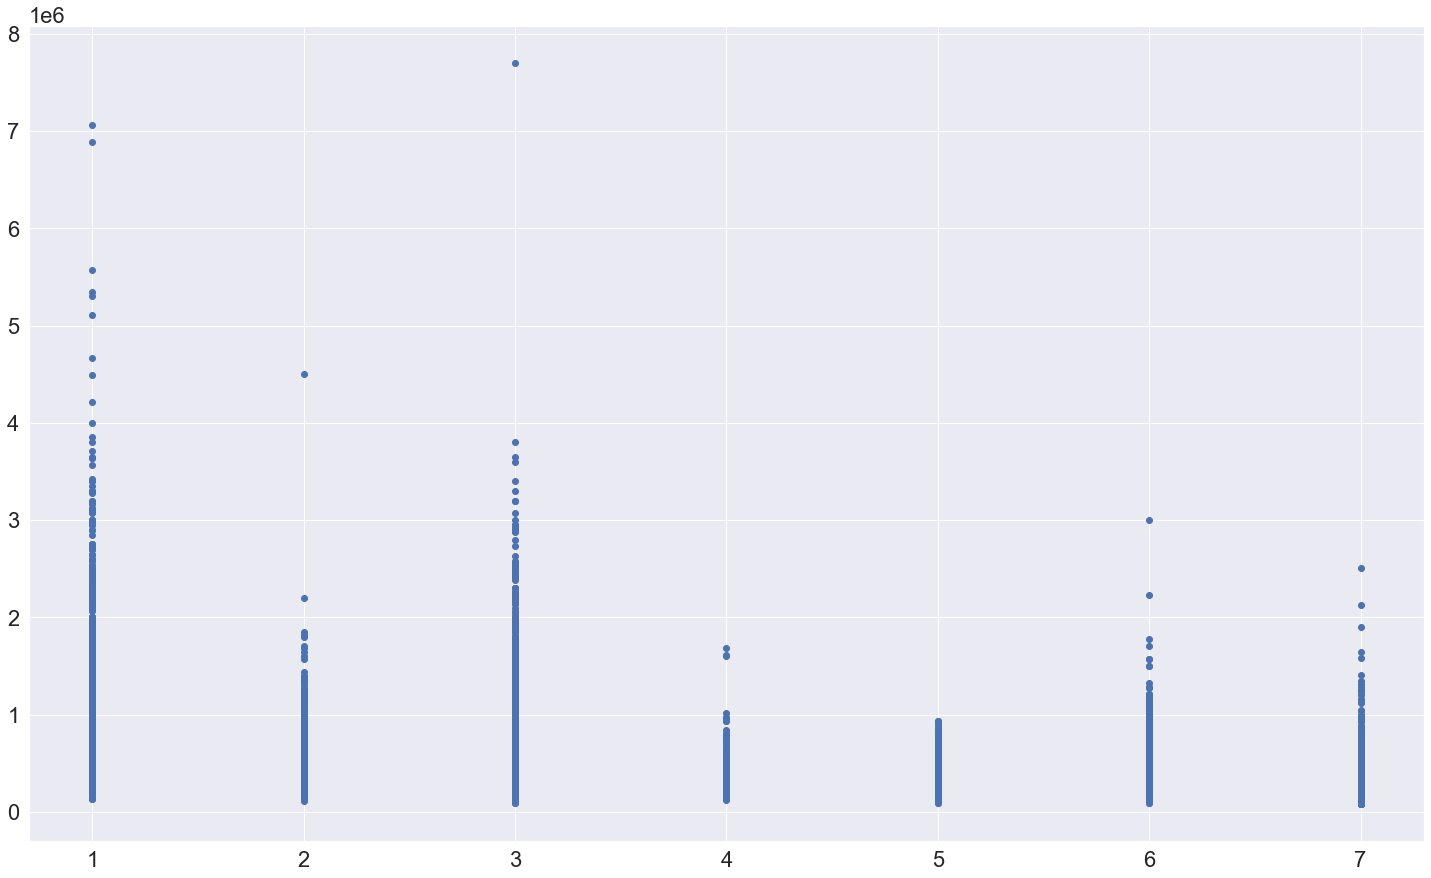

In [118]:
plt.figure(figsize=(25,15))
plt.scatter(x=data_pred2['grade_rank'], y=data_pred2['price'])

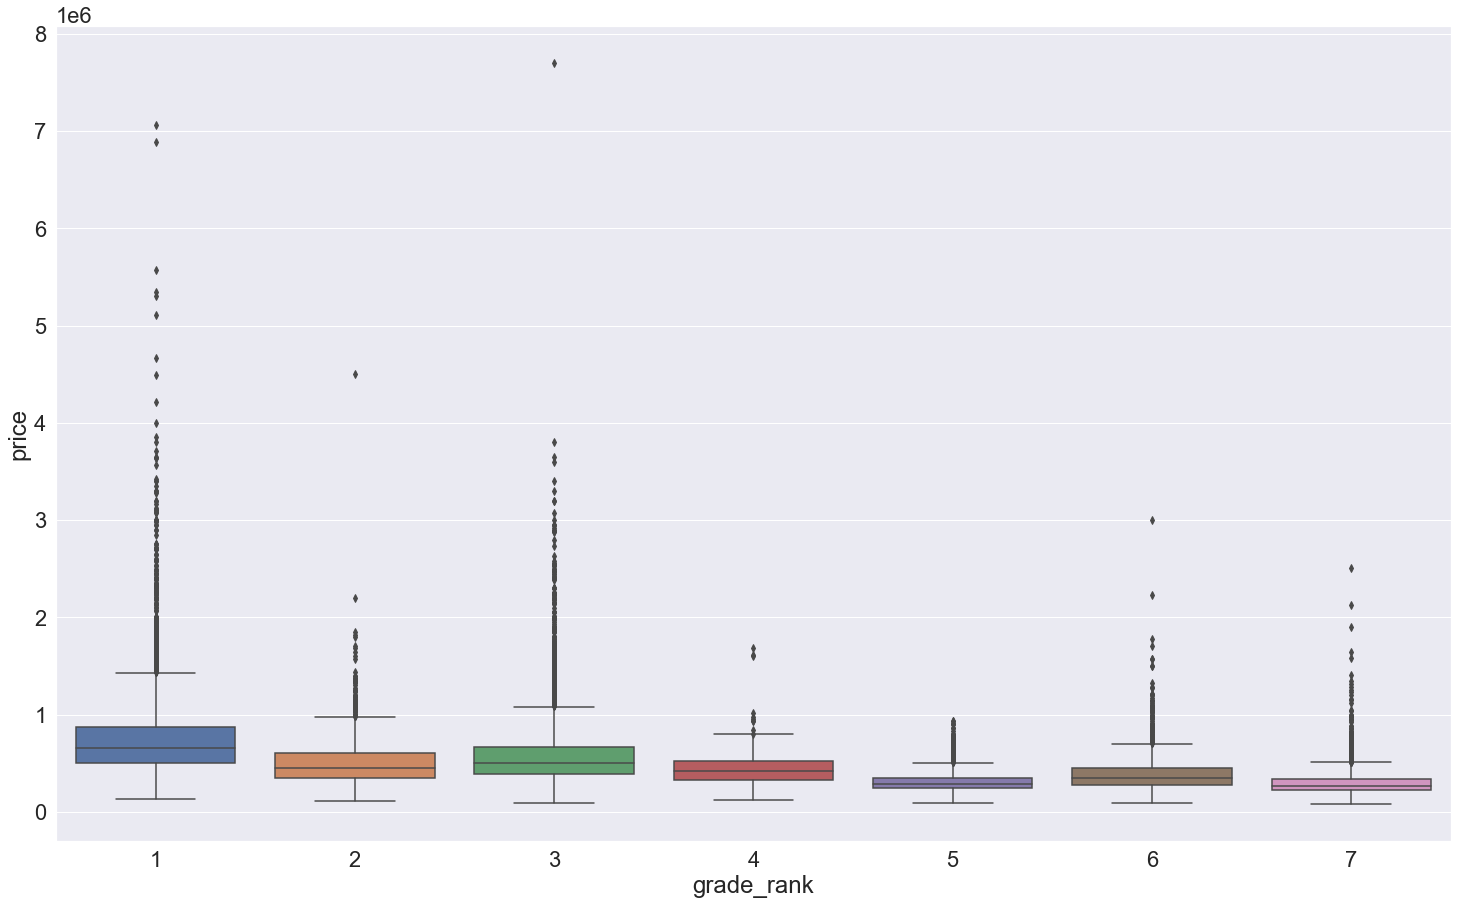

In [117]:
plt.figure(figsize=(25,15))
sns.set(font_scale=2)
sns.boxplot(x="grade_rank", y="price", data=data_pred2)

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


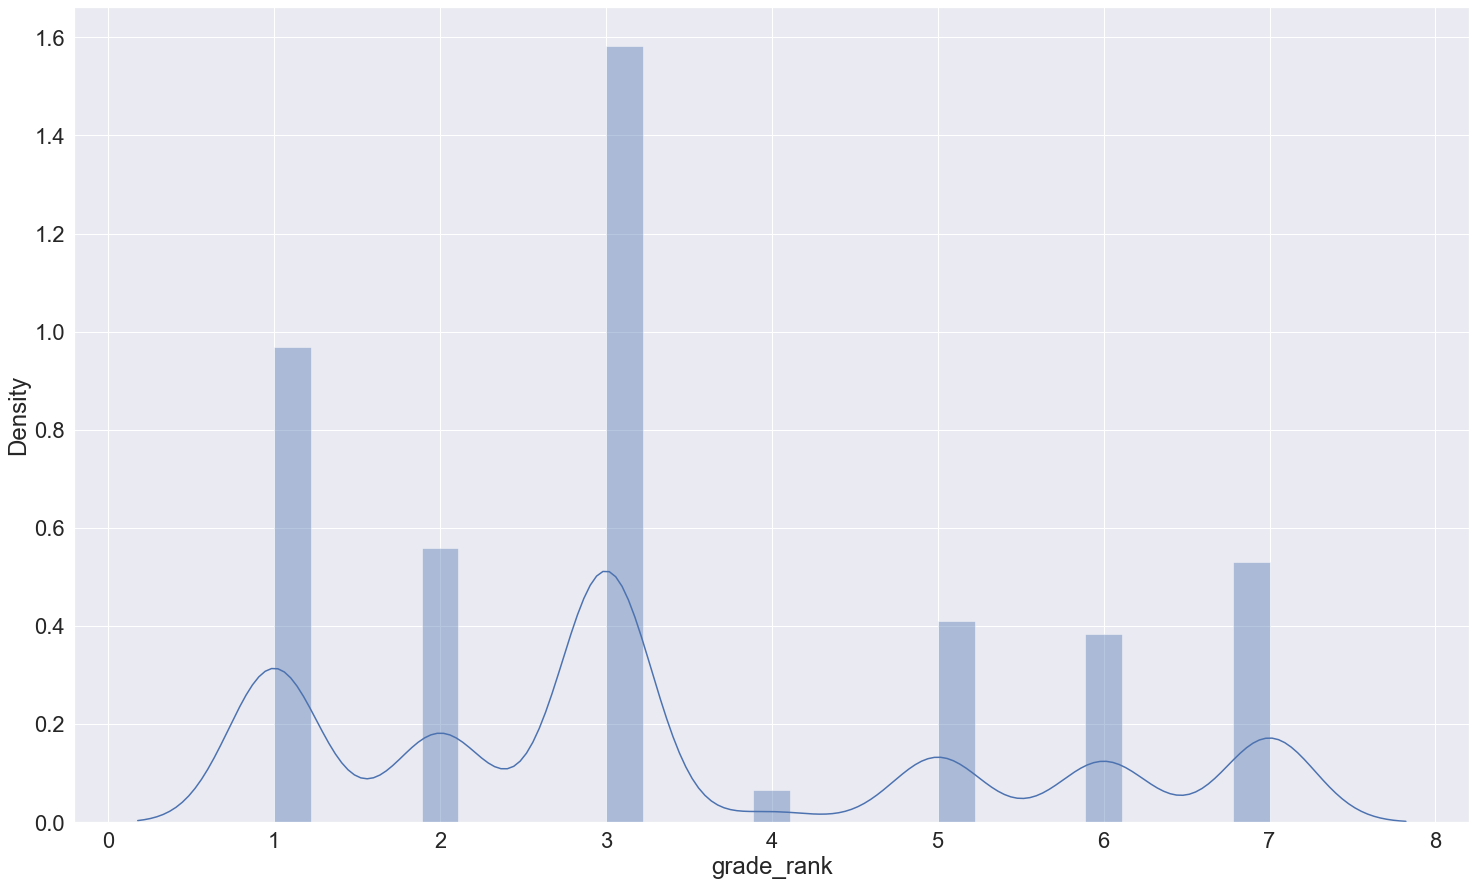

In [119]:
plt.figure(figsize=(25,15))
sns.distplot(data_pred2['grade_rank'])

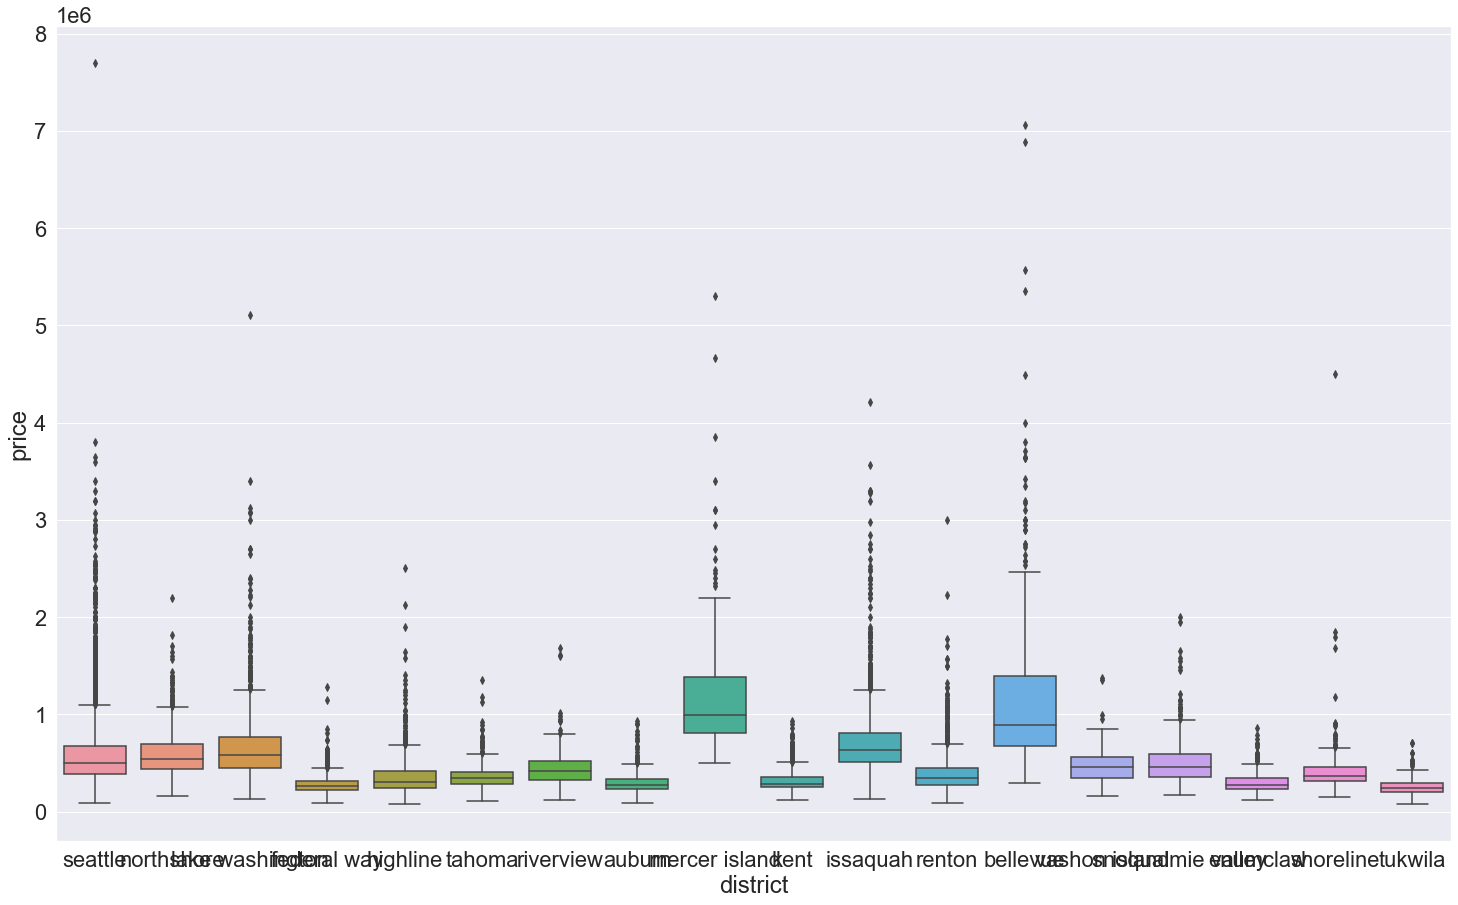

In [120]:
plt.figure(figsize=(25,15))
sns.boxplot(x="district", y="price", data=data_pred2)